# INTRODUCTION

## Imports

In [1]:
# Basics
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
#import warnings
#warnings.filterwarnings("ignore")

## Environment variables

In [2]:
PATH = 'data/openpowerlifting-2020-10-16/openpowerlifting-2020-10-16.csv'
TOP_TO_SHOW = 10

In [6]:
def get_weight_classes(federation, sex):
    """
    Get weight classes for a given sex and federation.

    :param str federation: federation to take weight classes from. 'IPF' or 'WRPF'.
    :param str sex: sex to take weight classes from. 'M' or 'F'.
    :return list bins:
    :return list labels:
    """
    if federation == 'IPF':
        if sex == 'M':
            bins = [0.0, 59.0, 66.0, 74.0, 83.0, 93.0, 105.0, 120.0, 1000.0]
            labels = ['59', '66', '74', '83', '93', '105', '120', '120+']
        elif sex == 'F':
            bins = [0.0, 47.0, 52.0, 57.0, 63.0, 72.0, 84.0, 1000.0]
            labels = ['47', '52', '57', '63', '72', '84', '84+']

    elif federation == 'WRPF':
        if sex == 'M':
            bins = [0.0, 56.0, 60.0, 67.5, 75.0, 82.5, 90.0, 100.0, 110.0, 125.0, 140.0, 1000.0]
            labels = ['56', '60', '67.5', '75', '82.5', '90', '100', '110', '125', '140', '140+']
        elif sex == 'F':
            bins = [0.0, 44.0, 48.0, 52.0, 56.0, 60.0, 67.5, 75.0, 82.5, 90.0, 1000.0]
            labels = ['44', '48', '52', '56', '60', '67.5 ', '75', '82.5', '90', '90+']

    return bins, labels

def load_data(path):
    # Load data
    data = pd.read_csv(path,
                       header=0,
                       names=['Name',
                              'Sex',
                              'Event',
                              'Equipment',
                              'Age',
                              'AgeClass',
                              'BirthYearClass',  #
                              'Division',
                              'Bodyweight',      # 'Bodyweight'
                              'WeightClass',     # 'WeightClassKg'
                              'Squat1',          # 'Squat1Kg'
                              'Squat2',          # 'Squat2Kg'
                              'Squat3',          # 'Squat3Kg'
                              'Squat4',          # 'Squat4Kg'
                              'SquatBest',       # 'Best3SquatKg'
                              'Bench1',          # 'Bench1Kg'
                              'Bench2',          # 'Bench2Kg'
                              'Bench3',          # 'Bench3Kg'
                              'Bench4',          # 'Bench4Kg'
                              'BenchBest',       # 'Best3BenchKg'
                              'Deadlift1',       # 'Deadlift1Kg'
                              'Deadlift2',       # 'Deadlift2Kg'
                              'Deadlift3',       # 'Deadlift3Kg'
                              'Deadlift4',       # 'Deadlift4Kg'
                              'DeadliftBest',    # 'Best3DeadliftKg'
                              'Total',           # 'TotalKg'
                              'Place',
                              'Dots',
                              'Wilks',
                              'Glossbrenner',
                              'Goodlift',
                              'Tested',
                              'Country',
                              'Federation',
                              'ParentFederation',
                              'Date',
                              'MeetCountry',
                              'MeetState',
                              'MeetTown',
                              'Meet'               # 'MeetName'
                              ],
                       usecols=['Name',
                                'Country',
                                'Sex',
                                'Age',
                                'Bodyweight',
                                'WeightClass',
                                'Date',
                                'Federation',
                                'ParentFederation',
                                'Meet',
                                'Event',
                                'Equipment',
                                'Squat1',
                                'Squat2',
                                'Squat3',
                                'SquatBest',
                                'Bench1',
                                'Bench2',
                                'Bench3',
                                'BenchBest',
                                'Deadlift1',
                                'Deadlift2',
                                'Deadlift3',
                                'DeadliftBest',
                                'Total',
                                'Wilks'
                                ],
                       dtype={'Name': 'str',
                              'Country': 'str',
                              'Sex': 'str',
                              'Age': 'float',
                              'Bodyweight': 'float',
                              'WeightClass': 'str',
                              'Federation': 'str',
                              'ParentFederation': 'str',
                              'Meet': 'str',
                              'Event': 'str',
                              'Equipment': 'str',
                              'Squat1': 'float',
                              'Squat2': 'float',
                              'Squat3': 'float',
                              'SquatBest': 'float',
                              'Bench1': 'float',
                              'Bench2': 'float',
                              'Bench3': 'float',
                              'BenchBest': 'float',
                              'Deadlift1': 'float',
                              'Deadlift2': 'float',
                              'Deadlift3': 'float',
                              'DeadliftBest': 'float',
                              'Total': 'float',
                              'Wilks': 'float'
                              },
                       parse_dates=['Date']
                       )
    return data

def clean_data(data, federation, equipment):

    # Filter data from complete meets
    data_clean = data.loc[data['Event'] == 'SBD']

    # Filter data from raw meets
    data_clean = data_clean.loc[data_clean['Equipment'].isin(equipment)]

    # Clean sex
    data_clean = data_clean.loc[data_clean['Sex'] != 'Mx']

    # Clean lifts
    data_clean = data_clean.dropna(subset=['SquatBest', 'BenchBest', 'DeadliftBest', 'Total'])

    # Obtain weight classes
    men_bins, men_labels = get_weight_classes(federation=federation, sex='M')
    women_bins, women_labels = get_weight_classes(federation=federation, sex='F')

    # Clean weight classes
    data_clean.loc[data_clean['Sex'] == 'M', 'WeightClass'] = pd.cut(data_clean.loc[data_clean['Sex'] == 'M', 'Bodyweight'],
                                                                     bins=men_bins,
                                                                     labels=men_labels
                                                                     )
    data_clean.loc[data_clean['Sex'] == 'F', 'WeightClass'] = pd.cut(data_clean.loc[data_clean['Sex'] == 'F', 'Bodyweight'],
                                                                     bins=women_bins,
                                                                     labels=women_labels
                                                                     )

    # Sort data
    data_clean = data_clean.sort_values(by='Wilks', ascending=False)

    return data_clean

In [4]:
data=load_data(PATH)
data.head()

,Name,Sex,Event,Equipment,Age,Bodyweight,WeightClass,Squat1,Squat2,Squat3,...,Deadlift2,Deadlift3,DeadliftBest,Total,Wilks,Country,Federation,ParentFederation,Date,Meet
0,Tucker Sanders,M,B,Single-ply,15.0,52.0,52,NaN,NaN,NaN,...,NaN,NaN,NaN,85.0,83.41,USA,USABPA,NaN,2019-04-06,Ronnie Coleman Classic
1,Xander Womack,M,B,Single-ply,14.0,100.0,100,NaN,NaN,NaN,...,NaN,NaN,NaN,162.5,98.90,USA,USABPA,NaN,2019-04-06,Ronnie Coleman Classic
2,Michael Womack III,M,B,Single-ply,16.0,67.5,67.5,NaN,NaN,NaN,...,NaN,NaN,NaN,110.0,84.81,USA,USABPA,NaN,2019-04-06,Ronnie Coleman Classic
3,Logan McCurley,M,B,Single-ply,16.0,75.0,75,NaN,NaN,NaN,...,NaN,NaN,NaN,117.5,83.73,USA,USABPA,NaN,2019-04-06,Ronnie Coleman Classic
4,Emily Jondron,F,B,Single-ply,21.0,90.0,90,NaN,NaN,NaN,...,NaN,NaN,NaN,160.0,138.25,USA,USABPA,NaN,2019-04-06,Ronnie Coleman Classic


In [12]:
df = clean_data(data,'IPF',['Raw'])
df_json = df.to_dict('records')

df2 = pd.DataFrame.from_records(df_json)
df2.head()

,Name,Sex,Event,Equipment,Age,Bodyweight,WeightClass,Squat1,Squat2,Squat3,...,Deadlift2,Deadlift3,DeadliftBest,Total,Wilks,Country,Federation,ParentFederation,Date,Meet
0,Marianna Gasparyan,F,SBD,Raw,30.0,57.7,63,NaN,NaN,NaN,...,NaN,NaN,217.5,580.0,666.63,NaN,USPA,IPL,2019-08-03,The Tribute
1,Marianna Gasparyan,F,SBD,Raw,31.0,56.0,57,-210.0,210.0,220.0,...,-215.0,-215.0,200.0,552.5,650.07,USA,WRPF,WRPF,2020-09-26,The Showdown
2,Marianna Gasparyan,F,SBD,Raw,29.0,59.4,63,NaN,NaN,NaN,...,NaN,NaN,215.0,565.0,634.84,USA,USPA,IPL,2018-08-25,The Tribute
3,Stefanie Cohen,F,SBD,Raw,26.0,54.8,57,182.5,190.0,-195.0,...,225.0,230.0,230.0,525.0,628.29,USA,WRPF,WRPF,2018-08-24,Boss of Bosses V
4,Chakera Ingram,F,SBD,Raw,23.0,81.5,84,NaN,NaN,NaN,...,NaN,NaN,282.5,692.5,627.25,USA,USPA,IPL,2018-06-02,Gulf Coast Open


In [10]:
df2.shape

(401484, 26)

In [17]:
data = data.loc[data['Equipment'].isin(['Raw', 'Wraps'])]
data = data.loc[data['Event'] == 'SBD']
data.groupby('Country').count()

,Name,Sex,Event,Equipment,Age,Bodyweight,WeightClass,Squat1,Squat2,Squat3,...,Deadlift1,Deadlift2,Deadlift3,DeadliftBest,Total,Wilks,Federation,ParentFederation,Date,Meet
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6,6,6,6,6,6,6,1,1,1,...,1,1,1,6,6,6,6,1,6,6
Algeria,158,158,158,158,136,158,158,155,155,151,...,153,151,142,154,147,147,158,158,158,158
American Samoa,1,1,1,1,0,1,1,0,0,0,...,0,0,0,1,1,1,1,0,1,1
Argentina,1644,1644,1644,1644,1532,1641,1641,1576,1550,1461,...,1551,1505,1389,1578,1573,1573,1644,1635,1644,1644
Armenia,165,165,165,165,159,165,131,141,141,135,...,138,129,117,150,149,149,165,71,165,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wales,423,423,423,423,284,423,423,353,351,345,...,353,344,335,422,420,420,423,412,423,423
Wallis and Futuna,5,5,5,5,1,5,5,5,5,5,...,5,5,4,5,5,5,5,5,5,5
Yugoslavia,1,1,1,1,1,1,1,0,0,0,...,0,0,0,1,1,1,1,0,1,1


## Logging

# DATA

## Loading

In [13]:
# Load meet data
logger.info('Import data')
data = pd.read_csv(PATH)
logger.debug('Number of entries: {}'.format(data.shape[0]))

# Select data from complete meets
logger.info('Fiter by SBD')
data = data.loc[data['Event'] == 'SBD']
logger.debug('Number of entries: {}'.format(data.shape[0]))

# Select data from raw meets
logger.info('Fiter by equipment')
data = data.loc[data['Equipment'] == 'Raw']
logger.debug('Number of entries: {}'.format(data.shape[0]))

2020-12-04 18:45:53,552 : INFO Import data
2020-12-04 18:46:00,742 : DEBUG Number of entries: 2116021
2020-12-04 18:46:00,743 : INFO Fiter by SBD
2020-12-04 18:46:01,387 : DEBUG Number of entries: 1487515
2020-12-04 18:46:01,388 : INFO Fiter by equipment
2020-12-04 18:46:01,704 : DEBUG Number of entries: 418429


## Cleaning

In [12]:
logger.info('Clean data')

# Clean sex
logger.debug('Clean Sex')
data = data.loc[data['Sex'] != 'Mx']

# Clean weight class
#     IPF men = [59,66,74,83,93,105,120,120+]
#     IPF women = [47,52,57,63,72,84,84+]
#     WRPF men = [56,60,67.5,75,82,5,90,100,110,125,140,140+]
#     WRPF women = [44,48,52,56,60,67.5,75,82.5,90,90+]
logger.debug('Clean WeightClassKg (using IPF weight classes)')

men_data = data[data['Sex'] == 'M']
men_bins = [0,59,66,74,83,93,105,120,1000]
men_labels = ['59','66','74','83','93','105','120','120+']
data.loc[data['Sex'] == 'M','WeightClassKg'] = pd.cut(data.loc[data['Sex'] == 'M','BodyweightKg'], bins=men_bins, labels=men_labels)

women_data = data[data['Sex'] == 'F']
women_bins = [0,47,52,57,63,72,84,1000]
women_labels = ['47','52','57','63','72','84','84+']
data.loc[data['Sex'] == 'F','WeightClassKg'] = pd.cut(data.loc[data['Sex'] == 'F','BodyweightKg'], bins=women_bins, labels=women_labels)

data = pd.concat([men_data,women_data], ignore_index=True)

2020-12-04 18:17:48,043 : INFO Clean data
2020-12-04 18:17:48,045 : DEBUG Clean Sex
2020-12-04 18:17:48,197 : DEBUG Clean WeightClassKg (using IPF weight classes)


## Additional filters

In [6]:
# Select data from best meet
logger.info('Fiter by best meet')
data = data.sort_values('TotalKg', ascending=False).drop_duplicates(['Name','WeightClassKg'])
logger.debug('Number of entries: {}'.format(data.shape[0]))

2020-12-04 18:13:15,266 : INFO Fiter by best meet
2020-12-04 18:13:15,993 : DEBUG Number of entries: 214018


In [21]:
data[data['Name'] == 'Taylor Atwood']

,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Goodlift,Tested,Country,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
498606,Taylor Atwood,M,SBD,Raw,25.5,24-34,24-39,MR-O,73.50,74,...,101.29,Yes,USA,USAPL,IPF,2014-07-17,USA,CO,NaN,Raw Nationals
507637,Taylor Atwood,M,SBD,Raw,26.5,24-34,24-39,MR-O,73.60,74,...,102.32,Yes,USA,USAPL,IPF,2015-10-15,USA,PA,Scranton,Raw Nationals
520892,Taylor Atwood,M,SBD,Raw,29.5,24-34,24-39,MR-O,73.80,74,...,114.01,Yes,USA,USAPL,IPF,2018-10-11,USA,WA,Spokane,Raw Nationals
543676,Taylor Atwood,M,SBD,Raw,25.5,24-34,24-39,MR-O,74.40,75,...,94.43,Yes,USA,USAPL,IPF,2014-02-01,USA,MN,NaN,MN State Meet & Midwest Open Championships
551868,Taylor Atwood,M,SBD,Raw,30.5,24-34,24-39,MR-O,73.47,74,...,116.05,Yes,USA,USAPL,IPF,2019-10-16,USA,IL,Lombard,Raw Nationals
564510,Taylor Atwood,M,SBD,Raw,28.5,24-34,24-39,MR-O,73.48,74,...,110.51,Yes,USA,USAPL,IPF,2017-10-10,USA,FL,Orlando,Raw National Championships
577581,Taylor Atwood,M,SBD,Raw,27.5,24-34,24-39,MR-O,73.60,74,...,106.74,Yes,USA,USAPL,IPF,2016-10-13,USA,GA,Atlanta,Raw Nationals
583213,Taylor Atwood,M,SBD,Raw,25.5,24-34,24-39,MR-O,76.20,82.5,...,101.22,Yes,USA,USAPL,IPF,2014-12-06,USA,MN,NaN,Minnesota Senior State Open
608670,Taylor Atwood,M,SBD,Raw,31.5,24-34,24-39,MR-G,76.00,83,...,111.49,Yes,USA,USAPL,IPF,2020-03-14,USA,NY,NaN,Squats and Science Championship
919278,Taylor Atwood,M,SBD,Raw,27.5,24-34,24-39,Open,73.74,74,...,106.26,Yes,USA,IPF,IPF,2016-06-19,USA,TX,Killeen,World Classic Powerlifting Championships


# ANALYTICS

## Participation per weight class

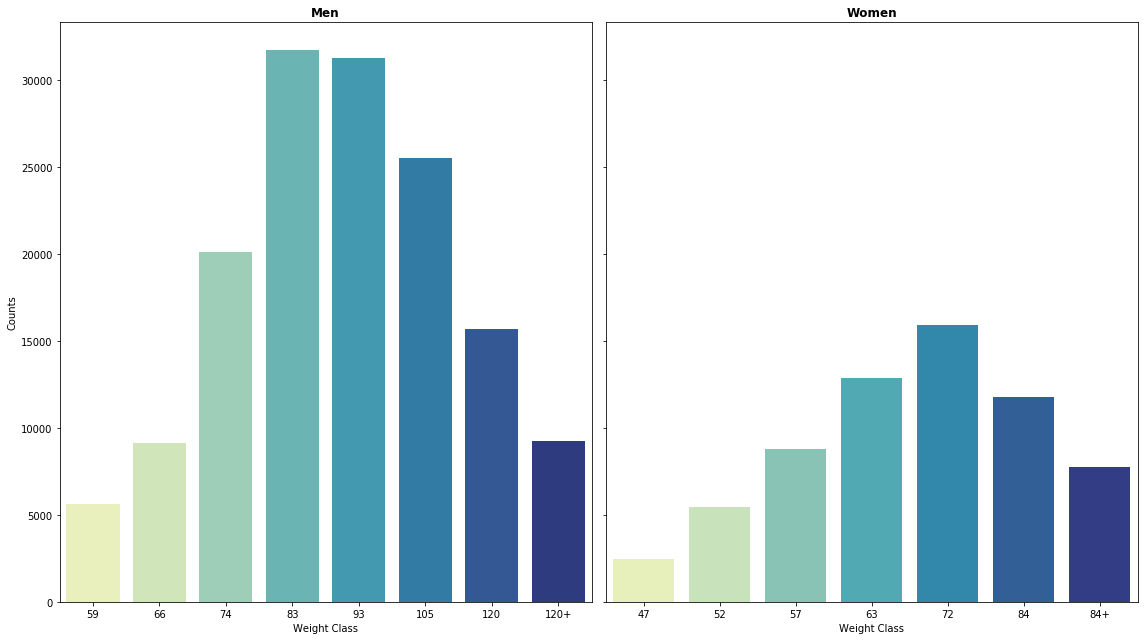

In [7]:
# Compute the counts per sex and weight class
df = data.groupby(['Sex','WeightClassKg'], as_index=False)['Name'].count().sort_values(['Sex','WeightClassKg'])

# Plot the data
fig, axs = plt.subplots(figsize=(16,9), nrows=1, ncols=2, sharey=True)
sns.barplot(x='WeightClassKg', 
            y='Name', 
            data=df[df['Sex'] == 'M'], 
            ax=axs[0], 
            order=men_labels, 
            palette='YlGnBu')
axs[0].set_title('Men', weight='bold')
axs[0].set_xlabel('Weight Class')
axs[0].set_ylabel('Counts')

sns.barplot(x='WeightClassKg', 
            y='Name', 
            data=df[df['Sex'] == 'F'], 
            ax=axs[1], 
            order=women_labels, 
            palette='YlGnBu')
axs[1].set_title('Women', weight='bold')
axs[1].set_xlabel('Weight Class')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

## Squat, bench, deadlift, total and wilks per weight class

In [8]:
# Select top of each class
df = data.groupby('WeightClassKg').head(TOP_TO_SHOW)

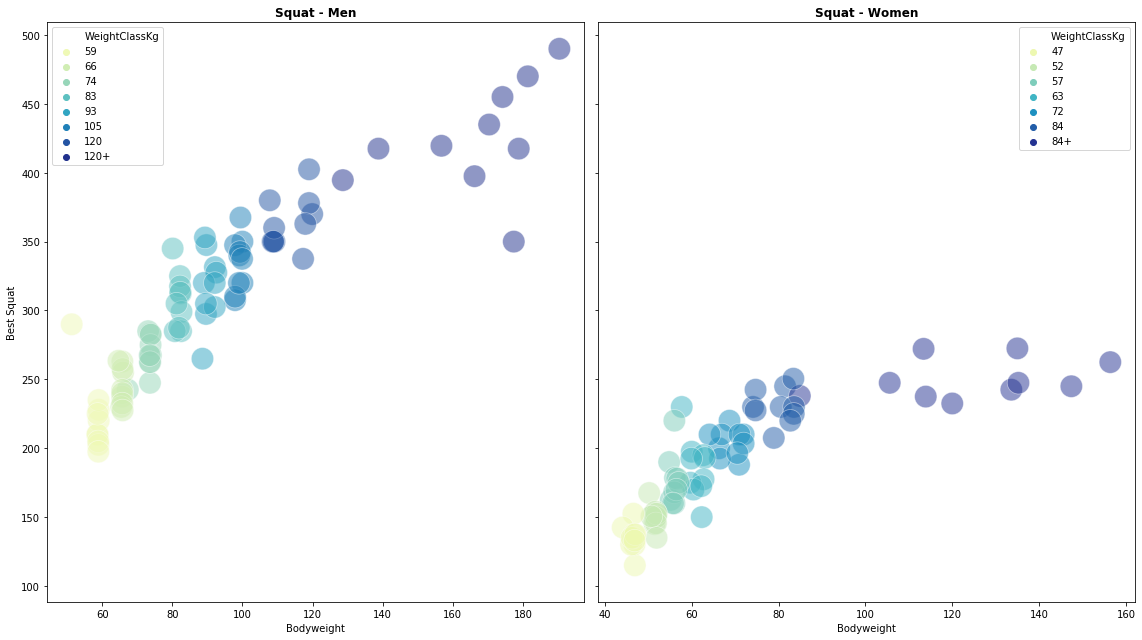

In [11]:
# Plot the data
fig, axs = plt.subplots(figsize=(16,9), nrows=1, ncols=2, sharey=True)
sns.scatterplot(x='BodyweightKg', 
                y='Best3SquatKg', 
                hue='WeightClassKg',
                hue_order=men_labels, 
                data=df[df['Sex'] == 'M'], 
                ax=axs[0], 
                s=500,
                alpha=0.5,
                palette='YlGnBu')
axs[0].set_title('Squat - Men', weight='bold')
axs[0].set_xlabel('Bodyweight')
axs[0].set_ylabel('Best Squat')

sns.scatterplot(x='BodyweightKg', 
                y='Best3SquatKg', 
                hue='WeightClassKg', 
                hue_order=women_labels, 
                data=df[df['Sex'] == 'F'], 
                ax=axs[1], 
                s=500,
                alpha=0.5,
                palette='YlGnBu')
axs[1].set_title('Squat - Women', weight='bold')
axs[1].set_xlabel('Bodyweight')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

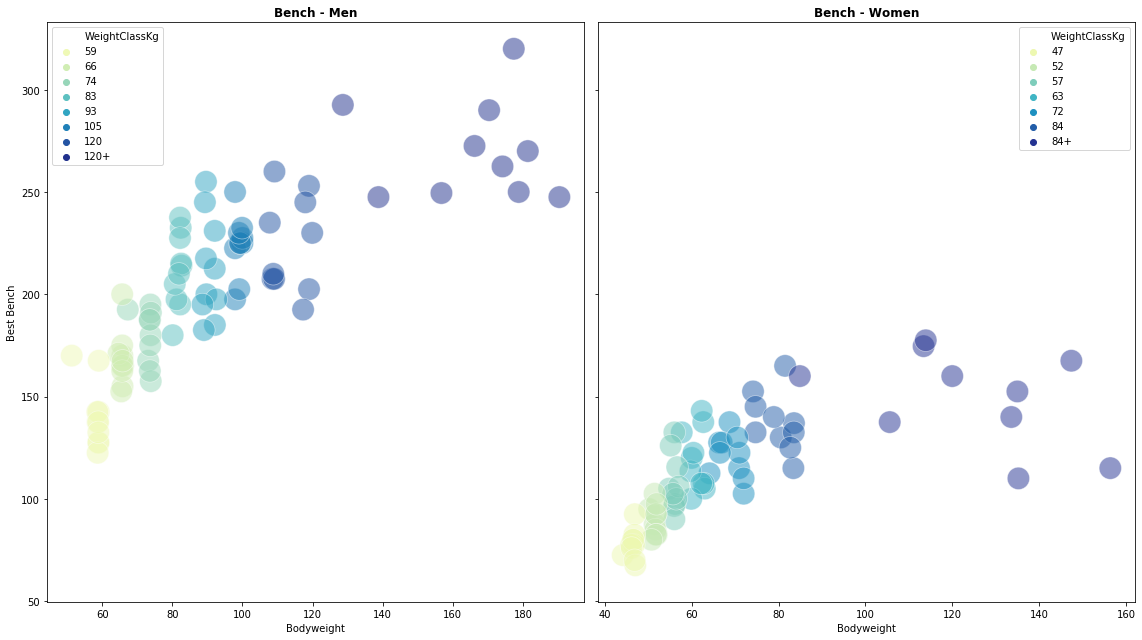

In [12]:
# Plot the data
fig, axs = plt.subplots(figsize=(16,9), nrows=1, ncols=2, sharey=True)
sns.scatterplot(x='BodyweightKg', 
                y='Best3BenchKg', 
                hue='WeightClassKg',
                hue_order=men_labels, 
                data=df[df['Sex'] == 'M'], 
                ax=axs[0], 
                s=500,
                alpha=0.5,
                palette='YlGnBu')
axs[0].set_title('Bench - Men', weight='bold')
axs[0].set_xlabel('Bodyweight')
axs[0].set_ylabel('Best Bench')

sns.scatterplot(x='BodyweightKg', 
                y='Best3BenchKg', 
                hue='WeightClassKg', 
                hue_order=women_labels, 
                data=df[df['Sex'] == 'F'], 
                ax=axs[1], 
                s=500,
                alpha=0.5,
                palette='YlGnBu')
axs[1].set_title('Bench - Women', weight='bold')
axs[1].set_xlabel('Bodyweight')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

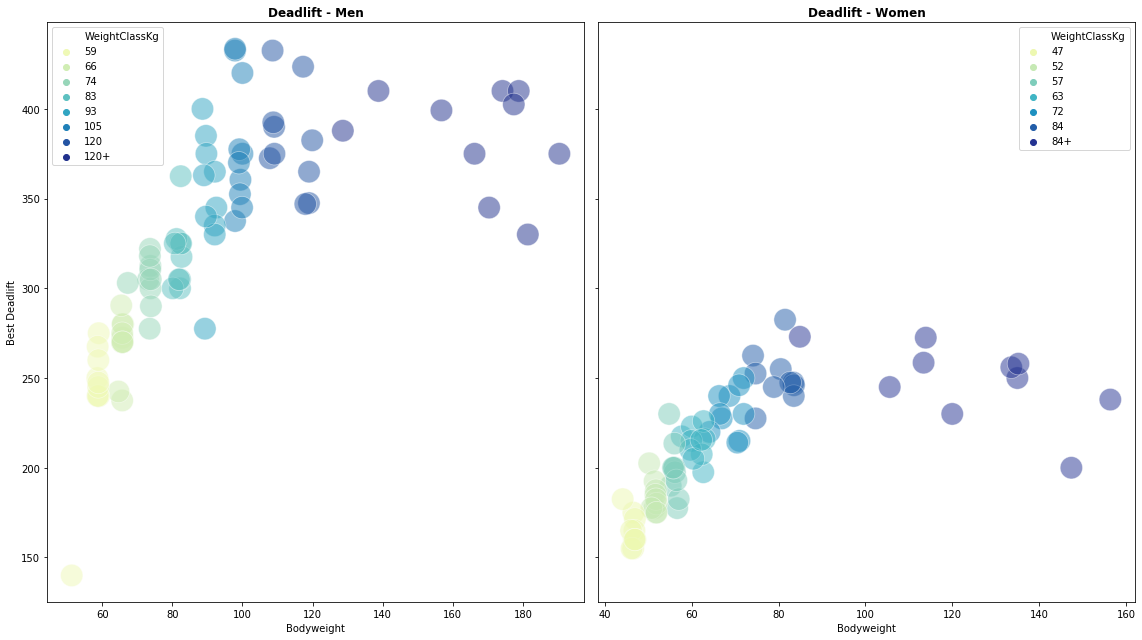

In [13]:
# Plot the data
fig, axs = plt.subplots(figsize=(16,9), nrows=1, ncols=2, sharey=True)
sns.scatterplot(x='BodyweightKg', 
                y='Best3DeadliftKg', 
                hue='WeightClassKg',
                hue_order=men_labels, 
                data=df[df['Sex'] == 'M'], 
                ax=axs[0], 
                s=500,
                alpha=0.5,
                palette='YlGnBu')
axs[0].set_title('Deadlift - Men', weight='bold')
axs[0].set_xlabel('Bodyweight')
axs[0].set_ylabel('Best Deadlift')

sns.scatterplot(x='BodyweightKg', 
                y='Best3DeadliftKg', 
                hue='WeightClassKg', 
                hue_order=women_labels, 
                data=df[df['Sex'] == 'F'], 
                ax=axs[1], 
                s=500,
                alpha=0.5,
                palette='YlGnBu')
axs[1].set_title('Deadlift - Women', weight='bold')
axs[1].set_xlabel('Bodyweight')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

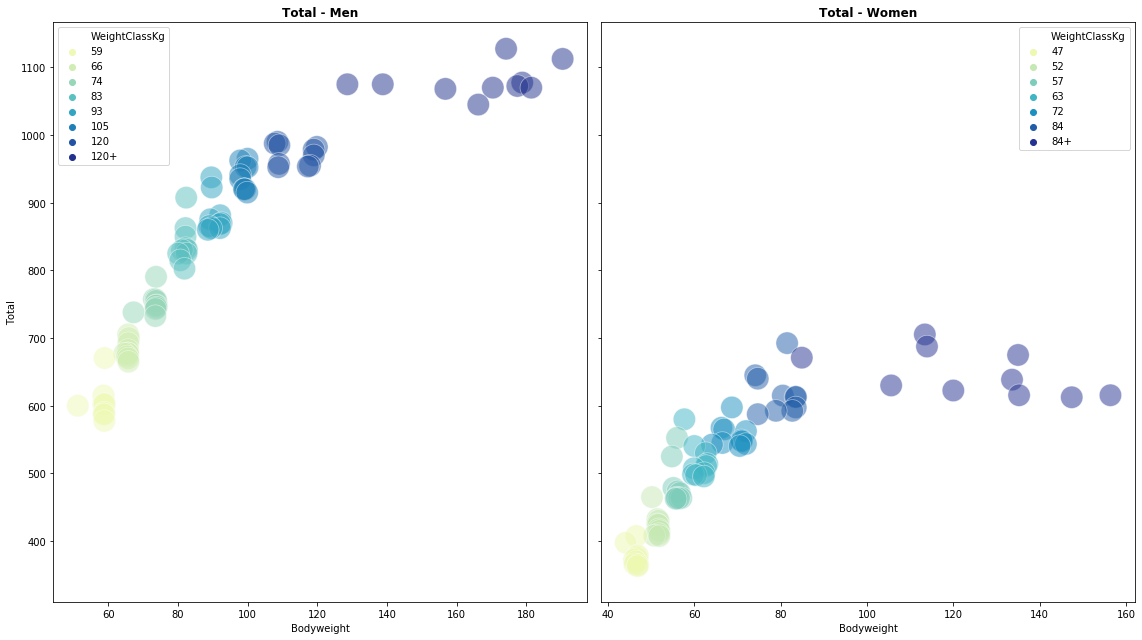

In [9]:
# Plot the data
fig, axs = plt.subplots(figsize=(16,9), nrows=1, ncols=2, sharey=True)
sns.scatterplot(x='BodyweightKg', 
                y='TotalKg', 
                hue='WeightClassKg',
                hue_order=men_labels, 
                data=df[df['Sex'] == 'M'], 
                ax=axs[0], 
                s=500,
                alpha=0.5,
                palette='YlGnBu')
axs[0].set_title('Total - Men', weight='bold')
axs[0].set_xlabel('Bodyweight')
axs[0].set_ylabel('Total')

sns.scatterplot(x='BodyweightKg', 
                y='TotalKg', 
                hue='WeightClassKg', 
                hue_order=women_labels, 
                data=df[df['Sex'] == 'F'], 
                ax=axs[1], 
                s=500,
                alpha=0.5,
                palette='YlGnBu')
axs[1].set_title('Total - Women', weight='bold')
axs[1].set_xlabel('Bodyweight')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

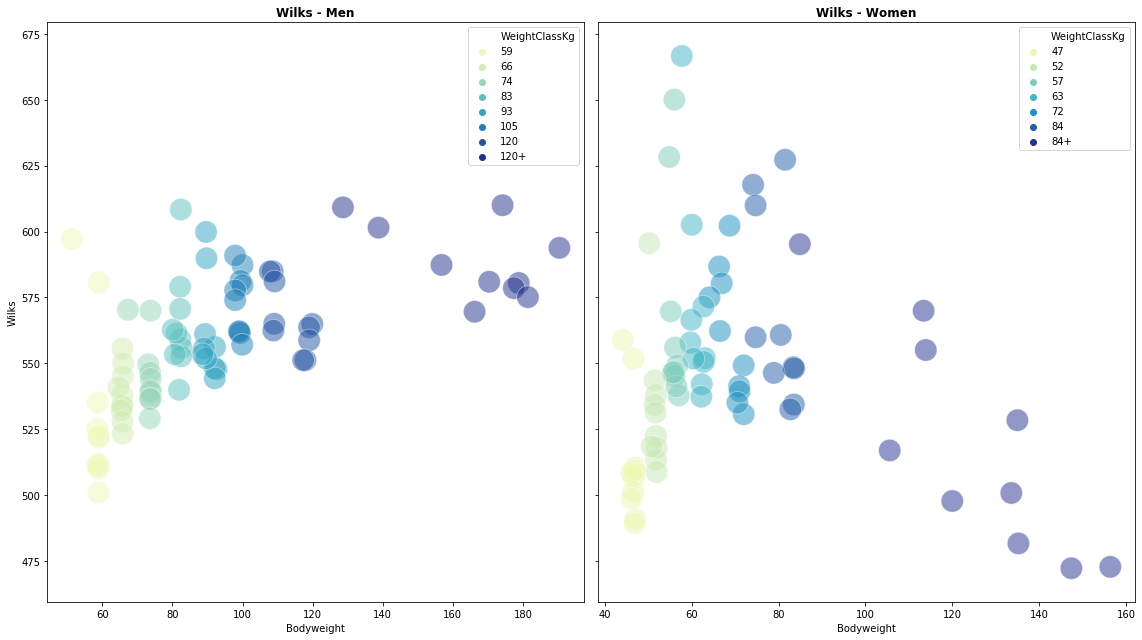

In [10]:
# Plot the data
fig, axs = plt.subplots(figsize=(16,9), nrows=1, ncols=2, sharey=True)
sns.scatterplot(x='BodyweightKg', 
                y='Wilks', 
                hue='WeightClassKg',
                hue_order=men_labels, 
                data=df[df['Sex'] == 'M'], 
                ax=axs[0], 
                s=500,
                alpha=0.5,
                palette='YlGnBu')
axs[0].set_title('Wilks - Men', weight='bold')
axs[0].set_xlabel('Bodyweight')
axs[0].set_ylabel('Wilks')

sns.scatterplot(x='BodyweightKg', 
                y='Wilks', 
                hue='WeightClassKg', 
                hue_order=women_labels, 
                data=df[df['Sex'] == 'F'], 
                ax=axs[1], 
                s=500,
                alpha=0.5,
                palette='YlGnBu')
axs[1].set_title('Wilks - Women', weight='bold')
axs[1].set_xlabel('Bodyweight')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()

## Relative squat, bench, deadlift and total per weight class